# Homework 1

In this homework, you will be working with the Lahman baseball statistics database. This database contains pitching, hitting, and fielding statistics for Major League Baseball from 1871 through 2016.  It includes data from the two current leagues (American and National), the four other "major" leagues (American Association, Union Association, Players League, and Federal League), and the National Association of 1871-1875. 

You will be working with the sqlite version of the Lahman database, which is avaiable at https://github.com/jknecht/baseball-archive-sqlite . Download the <b>2016</b> database file. You will be using some of the tables in this database for this homework.  

For documentation about the data and its tables, see http://www.seanlahman.com/files/database/readme2017.txt . Note that the documentation is for a dataset that includes the 2017 data, but most of it applies to the 2016 dataset. One difference is that the <i><b>People</i></b> table is named <i><b>Master</i></b> in the 2016 dataset. 

You need to use SQL queries and the code framework in the file SQLite.ipynb (sqlite3, pandas, matplotlib, seaborn) for this homework. 

<b>IMPORTANT</b>

Your submission should be an ipynb file named <i><b>YourFirstInitialLastname.ipynb</i></b> . A student named John Doe will have a submission named JDoe.ipynb . You can use the assignment description file and rename it by selecting <b>File</b> and then <b>Rename</b>.

You must use Python code to provide your solutions. Insert your code for each part in cells right after the description. Use the + on the top tab to insert cells. You can use the button labeled with the scissors to delete a cell. You can also change a cell from code to Markdown (such as this one) to insert comments and descriptions. 

## Part I (10 points)

(i) Display the names of the tables in the database.

(ii) Display the names of the columns in the table Master. 

(iii) Display the number of rows in the table Master.

(iv) Display the nameFirst and nameLast for players whose weight is greater than 280. 

In [1]:
import sqlite3

In [2]:
from sqlite3 import Error

def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

In [3]:
database = "C:/Users/Julia/Downloads/lahman2016.sqlite"
 
# create a database connection
conn = create_connection(database)

In [4]:
# create a cursor object instance which allows sql queries to be executed
cursor = conn.cursor()

In [5]:
# function for executing a query and printing results
def execute_query_and_print(cur, query):
    """
    Executes a query and prints results
    :param cur: the Cursor object
    :param query: the sql query to be executed
    :return:
    """
    cur.execute(query)
 
    rows = cur.fetchall()
 
#     for row in rows:
#         print(row)

    for row in rows:
        print(row)


(i) Display the names of the tables in the database.


In [6]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
cursor.execute(query)
for row in cursor.fetchall():
    print(row[0])


AllstarFull
Appearances
AwardsManagers
AwardsPlayers
AwardsShareManagers
AwardsSharePlayers
Batting
BattingPost
CollegePlaying
Fielding
FieldingOF
FieldingOFsplit
FieldingPost
HallOfFame
HomeGames
Managers
ManagersHalf
Master
Parks
Pitching
PitchingPost
Salaries
Schools
SeriesPost
Teams
TeamsFranchises
TeamsHalf


(ii) Display the names of the columns in the table Master. 


In [7]:
query = "SELECT * FROM Master;"
cursor.execute(query)

for row in cursor.description:
    print(row[0])

playerID
birthYear
birthMonth
birthDay
birthCountry
birthState
birthCity
deathYear
deathMonth
deathDay
deathCountry
deathState
deathCity
nameFirst
nameLast
nameGiven
weight
height
bats
throws
debut
finalGame
retroID
bbrefID


(iii) Display the number of rows in the table Master.

In [8]:
cursor.execute("SELECT count(*) FROM Master;")
count_rows = cursor.fetchall()
print("Num rows:",int(count_rows[0][0]))

Num rows: 19105


(iv) Display the nameFirst and nameLast for players whose weight is greater than 280.

In [9]:
query = """
SELECT m.namefirst, 
       m.namelast 
FROM   master m 
WHERE  m.weight > 280;
"""
cursor.execute(query)
for row in cursor.fetchall():
    print(row)


('Jumbo', 'Brown')
('Jonathan', 'Broxton')
('Bartolo', 'Colon')
('Adam', 'Dunn')
('Jeff', 'Niemann')
('Chad', 'Paronto')
('Calvin', 'Pickering')
('Jon', 'Rauch')
('Tyler', 'Robertson')
('CC', 'Sabathia')
('Kennys', 'Vargas')
('Dmitri', 'Young')
('Walter', 'Young')


## Part II (20 points)

(i) Group players in the Master table with the same birthyear, and report the birthyear, the average height, and the number of players for each birthyear. Order the results by birthyear ascending. Save the results into a Pandas DataFrame. 

(ii) Plot the results in (i) using a lineplot with the average height on the y axis and year on the x-axis. 


(iii) Do the same as in (i), but now only include groups with an average height > 70. 

(iv) Plot the results as in Part (ii)
***********************************

(i) Group players in the Master table with the same birthyear, and report the birthyear, the average height, and the number of players for each birthyear. Order the results by birthyear ascending. Save the results into a Pandas DataFrame.

In [10]:
import pandas as pd # for dataframe

In [11]:
def create_df_sql(query, connection):
    return pd.read_sql_query(query, connection)

In [12]:
query = """
SELECT DISTINCT m.birthyear,
                Avg(m.height)     AS "avgHeight",
                Count(m.playerid) AS "playerCount"
FROM            master m
WHERE           m.birthyear NOT null
AND             m.height NOT NULL
AND             m.playerid NOT NULL
GROUP BY        m.birthyear
ORDER BY        m.birthyear;
"""

master_table = create_df_sql(query, conn)
print(master_table.shape[0])
master_table.head(20)

161


,birthYear,avgHeight,playerCount
0,1835,69.000000,1
1,1836,63.000000,1
2,1838,69.000000,1
3,1839,72.000000,1
4,1840,68.500000,4
5,1841,68.333333,3
6,1842,68.400000,5
7,1843,67.500000,4
8,1844,68.833333,12
9,1845,69.153846,13


(ii) Plot the results in (i) using a lineplot with the average height on the y axis and year on the x-axis. 

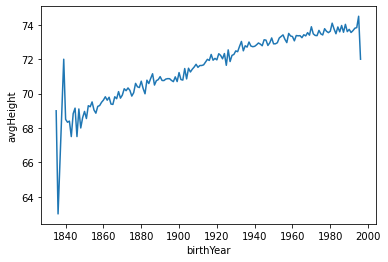

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.lineplot(x="birthYear", y="avgHeight", data=master_table)

(iii) Do the same as in (i), but now only include groups with an average height > 70. 

Create new dataframe by Modifying Data Frame by applying filter

In [14]:
new_master_table = master_table[master_table['avgHeight'] > 70]
new_master_table.head(10)

,birthYear,avgHeight,playerCount
3,1839,72.000000,1
32,1868,70.114286,70
35,1871,70.283019,53
36,1872,70.169492,59
37,1873,70.329114,79
38,1874,70.188235,85
40,1876,70.051546,97
41,1877,70.594595,74
42,1878,70.395349,86
43,1879,70.351648,91


(iv) Plot the results as in Part (ii)

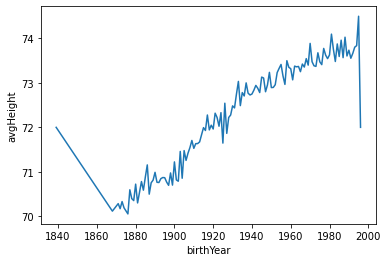

In [15]:
sns.lineplot(x="birthYear", y="avgHeight", data=new_master_table)


## Part III (20 points)

(i) Find the namefirst, namelast, playerid and yearid of all people who were successfully inducted into the Hall of Fame in descending order of yearid. Save the results into a Pandas DataFrame.

(ii) Display the first 10 rows of the dataframe in (i). 

(iii) Display the total number of rows of the dataframe in (i).


(iv) Find the people who were successfully inducted into the Hall of Fame and played in college at a school located in the state of California. For each person, return their namefirst, namelast, playerid, school name (name_full), and yearid in descending order of yearid. Break ties on yearid by school name (ascending). yearid refers to the year of induction into the Hall of Fame. Save the results in a dataframe and display the entire dataframe. 

(i) Find the namefirst, namelast, playerid and yearid of all people who were successfully inducted into the Hall of Fame in descending order of yearid. Save the results into a Pandas DataFrame.

In [16]:
query = """
SELECT m.namefirst,
       m.namelast,
       h.playerid,
       h.yearid
FROM   halloffame h
       INNER JOIN master m
               ON h.playerid = m.playerid
WHERE  h.inducted = 'Y'
ORDER  BY h.yearid DESC; 
"""

hall_of_fame_player_table = create_df_sql(query, conn)
print(hall_of_fame_player_table.shape[0])

317


(ii) Display the first 10 rows of the dataframe in (i). 

In [17]:
hall_of_fame_player_table.head(10)


,nameFirst,nameLast,playerID,yearid
0,Jeff,Bagwell,bagweje01,2017
1,Tim,Raines,raineti01,2017
2,Ivan,Rodriguez,rodriiv01,2017
3,John,Schuerholz,schurjo99,2017
4,Bud,Selig,seligbu99,2017
5,Ken,Griffey,griffke02,2016
6,Mike,Piazza,piazzmi01,2016
7,Craig,Biggio,biggicr01,2015
8,Randy,Johnson,johnsra05,2015
9,Pedro,Martinez,martipe02,2015


(iii) Display the total number of rows of the dataframe in (i).

In [18]:
hall_of_fame_player_table.shape[0]

317

(iv) Find the people who were successfully inducted into the Hall of Fame and played in college at a school located in the state of California. For each person, return their namefirst, namelast, playerid, school name (name_full), and yearid in descending order of yearid. Break ties on yearid by school name (ascending). yearid refers to the year of induction into the Hall of Fame. Save the results in a dataframe and display the entire dataframe. 

In [19]:
query = """
SELECT DISTINCT m.namefirst, 
                m.namelast, 
                h.playerid, 
                s.name_full, 
                h.yearid 
FROM   halloffame h 
       JOIN collegeplaying c 
         ON h.playerid = c.playerid 
       JOIN master m 
         ON h.playerid = m.playerid 
       JOIN schools s 
         ON c.schoolid = s.schoolid 
WHERE  s.state = 'CA' 
       AND h.inducted = 'Y' 
ORDER  BY h.yearid DESC, 
          s.name_full ASC; 
"""
hall_of_fame_cali = create_df_sql(query, conn)


In [20]:
hall_of_fame_cali

,nameFirst,nameLast,playerID,name_full,yearid
0,Randy,Johnson,johnsra05,University of Southern California,2015
1,Pat,Gillick,gillipa99,Los Angeles Valley College,2011
2,Pat,Gillick,gillipa99,University of Southern California,2011
3,Doug,Harvey,harvedo99,San Diego State University,2010
4,Dick,Williams,willidi02,Pasadena City College,2008
5,Tony,Gwynn,gwynnto01,San Diego State University,2007
6,Ozzie,Smith,smithoz01,"California Polytechnic State University, San L...",2002
7,Tom,Seaver,seaveto01,Fresno City College,1992
8,Tom,Seaver,seaveto01,University of Southern California,1992
9,Joe,Morgan,morgajo02,Merritt College,1990


## Part IV (20 points)

Find the namefirst, namelast, playerid, yearid, and single-year slg (Slugging Percentage) of the players and save the results in a dataframe. For statistical significance, only include players with more than 50 at-bats in the season. Order the results by slg descending. 

Display the players with the 10 best annual Slugging Percentage recorded over all time. 

Slugging Percentage is not provided in the database. It can be computed using a formula given at https://en.wikipedia.org/wiki/Slugging_percentage and the data in the database. Note that there is one term in the formula that is not directly available as a column in the database. You will have to compute it using some of the columns. 

Also, you have to compute slg as a floating point number, so make sure to use SQL in a way to get this. 

In [21]:
query = """
SELECT DISTINCT m.namefirst, 
                m.namelast, 
                b.playerid, 
                b.yearid, 
                Round(Cast(b.[h] - b.[2b] - b.[3b] - b.[hr] + 2 * b.[2b] + 3 * 
                           b.[3b] + 4 * 
                           b.[hr] AS 
                                 FLOAT) / Cast(b.[ab] AS FLOAT), 4) AS SLG 
FROM   batting b 
       INNER JOIN master m 
               ON b.playerid = m.playerid 
WHERE  b.ab > 50 
ORDER  BY slg DESC
LIMIT 10; 
"""

good_batters_table = create_df_sql(query, conn)

In [22]:
good_batters_table

,nameFirst,nameLast,playerID,yearID,SLG
0,Shane,Spencer,spencsh01,1998,0.9104
1,Ted,Williams,willite01,1953,0.9011
2,Barry,Bonds,bondsba01,2001,0.8634
3,Babe,Ruth,ruthba01,1920,0.8490
4,Babe,Ruth,ruthba01,1921,0.8463
5,Jeff,Baker,bakerje03,2006,0.8246
6,Marlon,Anderson,anderma02,2006,0.8125
7,Barry,Bonds,bondsba01,2004,0.8123
8,Barry,Bonds,bondsba01,2002,0.7990
9,Babe,Ruth,ruthba01,1927,0.7722


Display the players with the 10 best annual Slugging Percentage recorded over all time. 

## Part V (20 points)

(i) Find the yearid, min, max, and average of all player salaries for each year recorded, ordered by yearid in ascending order. Save the results as a dataframe and display it. 

(ii) For the player salaries in 2016, display a histogram with 10 bins. You may use the dataframe.hist(bin=10) function to do this. Also, it may be nicer to divide the salaries by 1,000,000 to show the amounts in millions. 

(i) Find the yearid, min, max, and average of all player salaries for each year recorded, ordered by yearid in ascending order. Save the results as a dataframe and display it.

In [23]:
query = """
SELECT s.yearid, 
       Min(s.salary) AS "minSalary", 
       Max(s.salary) AS "maxSalary", 
       Avg(s.salary) AS "avgSalary" 
FROM   salaries s 
GROUP  BY s.yearid 
ORDER  BY s.yearid ASC;
"""

salary_info_table = create_df_sql(query, conn)

In [24]:
salary_info_table

,yearID,minSalary,maxSalary,avgSalary
0,1985,60000.0,2130300.0,4.762994e+05
1,1986,60000.0,2800000.0,4.171470e+05
2,1987,62500.0,2127333.0,4.347295e+05
3,1988,62500.0,2340000.0,4.531711e+05
4,1989,62500.0,2766667.0,5.063231e+05
5,1990,100000.0,3200000.0,5.119737e+05
6,1991,100000.0,3800000.0,8.949612e+05
7,1992,109000.0,6100000.0,1.047521e+06
8,1993,0.0,6200000.0,9.769666e+05
9,1994,50000.0,6300000.0,1.049589e+06


(ii) For the player salaries in 2016, display a histogram with 10 bins. You may use the dataframe.hist(bin=10) function to do this. Also, it may be nicer to divide the salaries by 1,000,000 to show the amounts in millions.

In [25]:
query = """
SELECT salary / 1000000.0 AS "2016 Salaries in Millions" FROM Salaries WHERE yearid = 2016;
"""
salaries_2016 = create_df_sql(query, conn)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D59595F8B0>]],
      dtype=object)

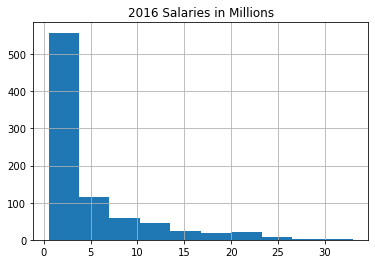

In [26]:
salaries_2016.hist(bins=10)

## Part VI (10 points)

Extract and display a facet of the dataset that you think is interesting. This should not be a facet from Parts I-V. 

best performing states

In [27]:
query = """
SELECT DISTINCT s.state,
                Count(h.playerid) AS "inductedMemberCount"
FROM   halloffame h,
       schools s,
       collegeplaying c
WHERE  h.playerid = c.playerid
       AND h.inducted = 'Y'
       AND c.schoolid = s.schoolid
GROUP  BY s.state
ORDER  BY inductedmembercount DESC,
          s.state; 
"""

top_states_baseball = create_df_sql(query, conn)

In [28]:
top_states_baseball

,state,inductedMemberCount
0,CA,21
1,NY,15
2,PA,10
3,OH,9
4,MI,8
5,AL,7
6,FL,7
7,MN,6
8,KY,5
9,TX,5


This facet reveals that interestingly, California and New York have far more 

In [29]:
cursor.close()
conn.close()